# Clustering and PCA

### Mushroom Dataset

In [1]:
# load basic libraries

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  
from sklearn.decomposition import PCA

### Read the dataset

In [2]:
df= pd.read_csv('../Data/mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poisonous,convex,smooth,brown,bruises,pungent,free,close,narrow,black,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,edible,convex,smooth,yellow,bruises,almond,free,close,broad,black,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,edible,bell,smooth,white,bruises,anise,free,close,broad,brown,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,poisonous,convex,scaly,white,bruises,pungent,free,close,narrow,brown,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,edible,convex,smooth,gray,no,none,free,crowded,broad,black,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


### Data Exploration

In [3]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,edible,convex,scaly,brown,no,none,free,close,broad,buff,...,smooth,white,white,partial,white,one,pendant,white,several,woods
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

#### Calculate the number of nulls for each feature

In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

#### Look for strange values. To do this, see the different values in each feature

In [6]:
columns = df.columns
n_values = [df[a].unique() for a in df.columns]

data = pd.DataFrame()
data['features'] = columns
data['n_values'] = n_values
data

,features,n_values
0,class,"[poisonous, edible]"
1,cap-shape,"[convex, bell, sunken, flat, knobbed, conical]"
2,cap-surface,"[smooth, scaly, fibrous, grooves]"
3,cap-color,"[brown, yellow, white, gray, red, pink, buff, ..."
4,bruises,"[bruises, no]"
5,odor,"[pungent, almond, anise, none, foul, creosote,..."
6,gill-attachment,"[free, attached]"
7,gill-spacing,"[close, crowded]"
8,gill-size,"[narrow, broad]"
9,gill-color,"[black, brown, gray, pink, white, chocolate, p..."


#### See how many values are in each feature, do all the features provide information? If one does not provide information, delete it

In [7]:
df = df.drop(['veil-type'],axis = 1)

#### Separate between predictor variables and target

In [8]:
y = df['class']
X = df.drop(['class'] , axis  = 1)

#### Translate categorical variables into numeric

In [9]:
X = pd.get_dummies(X)

#### Train test split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## PCA

### How many predictir variables do we have? Is it easy to visualize them all together?

Well, **PCA to the rescue**: just tell it how many dimensions (2D for example) you want to visualize, then it will choose those that retain more information.

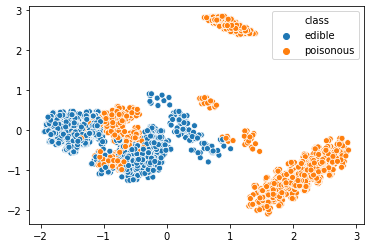

In [11]:
pca = PCA(n_components=2)
pca.fit(X_train)

pca_trans = pca.transform(X_train)

sns.scatterplot(x = pca_trans[:,0], y = pca_trans[:,1], hue = y_train , legend = "full")

Can you see the clusters?

#### Now we will train a classifier (don't worry you will know more about it in session 4!)

In [12]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators = 50)
clf.fit(X_train, y_train)
clf.score(X_test,y_test)

1.0

#### How many features do we need?

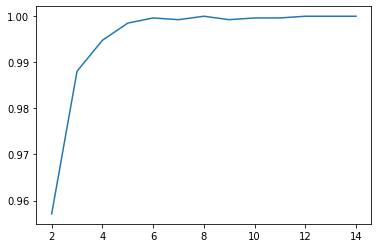

In [13]:
n_features = range(2,15)
scores = []

for n in n_features:
    pca = PCA(n_components=n)
    pca.fit(X_train)
    clf = RandomForestClassifier(n_estimators = 50)
    clf.fit(pca.transform(X_train), y_train)
    scores.append(clf.score(pca.transform(X_test),y_test))
    
sns.lineplot(x=n_features, y=scores)
    

#### from about 10 features we already have the score we wanted

## Clustering

Now how about some clustering?

**Step 1**: import the Kmeans function from sklearn <br>
**Step 2**: find the optimal number of clusters. Hint: elbow method <br>
**Step 3**: Generate the kmeans models, then evaluate them. Don't forget to visualize the result!

[K-Means on sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

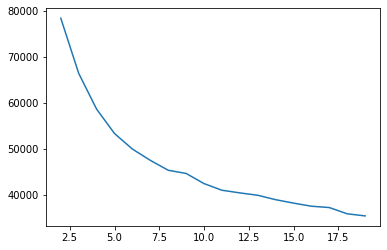

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
scores = []
silhouette_scores = []
k_values = range(2,20)
for a in k_values:
    kmeans = KMeans(n_clusters=a, random_state=0).fit(X)
    scores.append(kmeans.inertia_)
    
sns.lineplot(x=k_values, y=scores)

Can you see how many clusters we need? Lets explore how well the different clusters have separated the information. To do this, a ***factorplot*** is going to be done using seaborn will do it for you. With this, we can see the distribution of the class to be predicted based on the Kmeans

0.2680298431424325


C:\Users\20190958\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


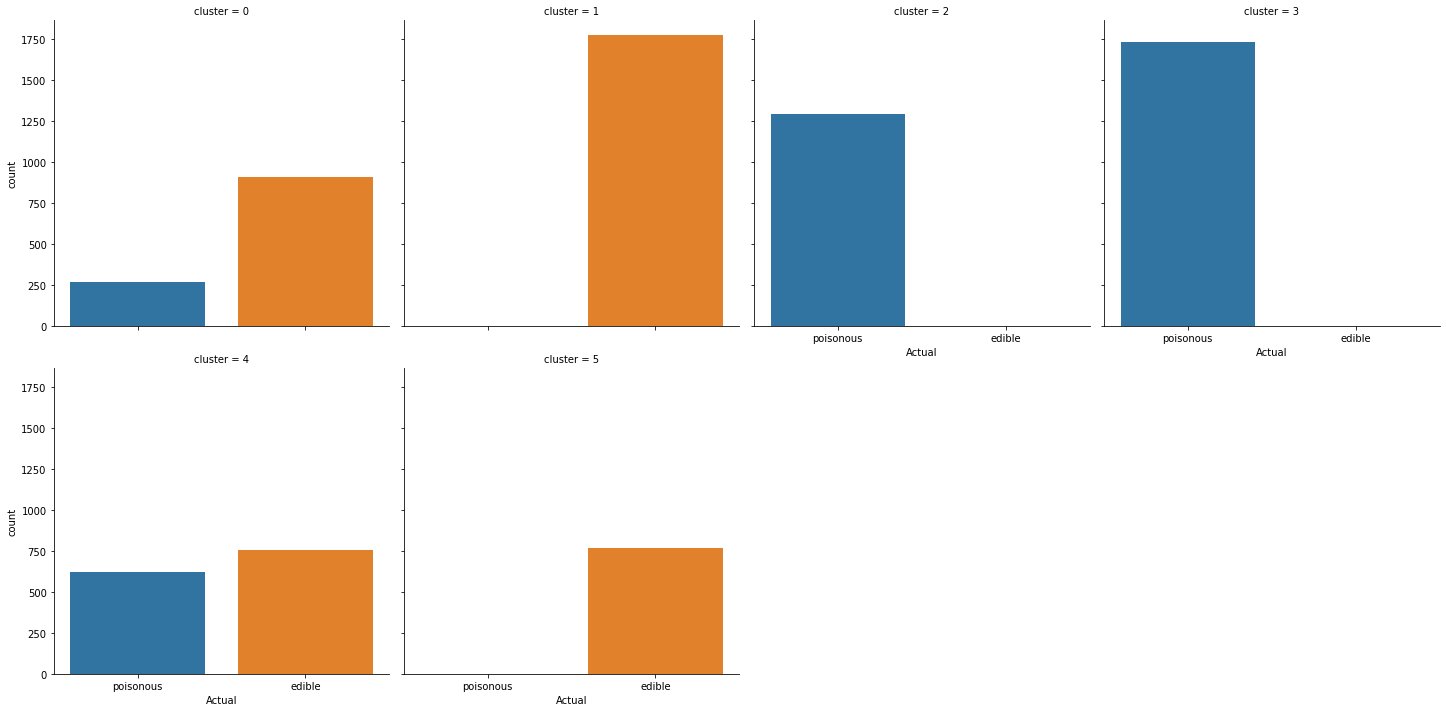

In [18]:
# Train Kmeans with the K value obtained

kmeans = KMeans(n_clusters=6, random_state=0).fit(X)
# get the silhoute score
print(silhouette_score(X, kmeans.predict(X)))
# Prepare the factorplot
cluster_result = pd.DataFrame()
cluster_result['cluster'] = kmeans.predict(X)
cluster_result['Actual'] = y

ax = sns.factorplot(col='cluster', x='Actual', data=cluster_result, kind='count',col_wrap=4)

#### Let's visualize the clusters. Do you remember what should we do first to visualize all the features in 2-dimensions?Let's see how this is painted. To do this, we repeat the scatterplot from before but 
***Don't forget to use the cluster assigned by kmeans as the color.***

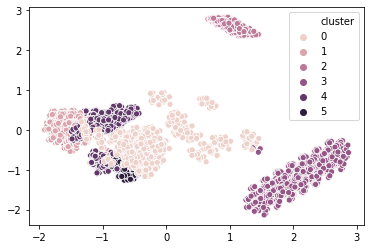

In [16]:
pca = PCA(n_components=2)
pca.fit(X)
pca_trans = pca.transform(X)
sns.scatterplot(x = pca_trans[:,0], y = pca_trans[:,1], hue = cluster_result['cluster'] , legend = "full")

#### Use the pd.crosstab() to count the number of times each mushroom class coincides with each cluster label.

In [17]:
ct = pd.crosstab(cluster_result['cluster'], cluster_result['Actual'])
ct

Actual,edible,poisonous
cluster,,
0,912,268
1,1776,0
2,0,1296
3,0,1732
4,752,620
5,768,0
